# Filtering
Filters are arbitrary linear functions and can therefore be used to perform many different kinds of operations. In this exercise, we will explore image filtering, a powerful technique in image processing, to understand how filters can be applied to modify, or extract specific features from images.
As a first step, import the necessary libraries:


In [2]:
import numpy as np
from skimage import data, color
from scipy.ndimage import convolve, correlate
from scipy import stats, signal
from skimage import filters, feature, transform, io
from skimage.transform import pyramid_gaussian
import matplotlib.pyplot as plt

We will use the same set of example images from the Scikit-Image library that were used in the tutorial. You can use and modify the code below to load and inspect any of the images: 


['astronaut', 'binary_blobs', 'brain', 'brick', 'camera', 'cat', 'cell', 'cells3d', 'checkerboard', 'chelsea', 'clock', 'coffee', 'coins', 'colorwheel', 'data_dir', 'download_all', 'eagle', 'file_hash', 'grass', 'gravel', 'horse', 'hubble_deep_field', 'human_mitosis', 'immunohistochemistry', 'kidney', 'lbp_frontal_face_cascade_filename', 'lfw_subset', 'lily', 'logo', 'microaneurysms', 'moon', 'nickel_solidification', 'page', 'protein_transport', 'retina', 'rocket', 'shepp_logan_phantom', 'skin', 'stereo_motorcycle', 'text', 'vortex']


(-0.5, 383.5, 302.5, -0.5)

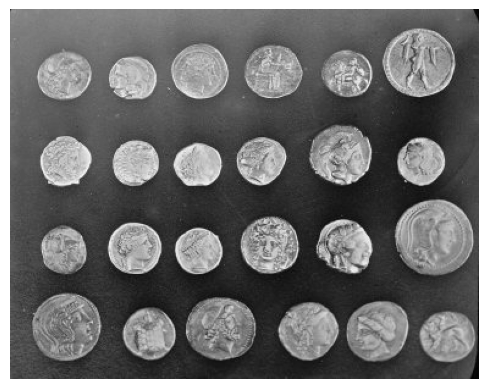

In [3]:
print(data.__all__)
plt.imshow(data.coins(), cmap="gray")
plt.axis(False)


---
**Task 1 (easy): Shifting pixels👩‍💻♾️**
Construct a filter that shifts pixels in the image by $n$ pixels to the right.
1. Create a function with parameter `n`
 that returns a kernel that can be used to shift an image `n`
 pixels to the right.
2. Apply the filter to one of the example images and show the results. Try out multiple different values for `n`
.
3. Make the functions `shift_to_left`
, `shift_to_up`
, and `shift_to_down`
 to shift the input images $n$ pixels to the left, up and down. Use one of the example images to test these functions and evaluate if the images are correctly shifted. 
4. (Optional) Modify the filter to not only shift the pixel to the right (or the other directions) but also decrease its brightness.


---

(-0.5, 383.5, 302.5, -0.5)

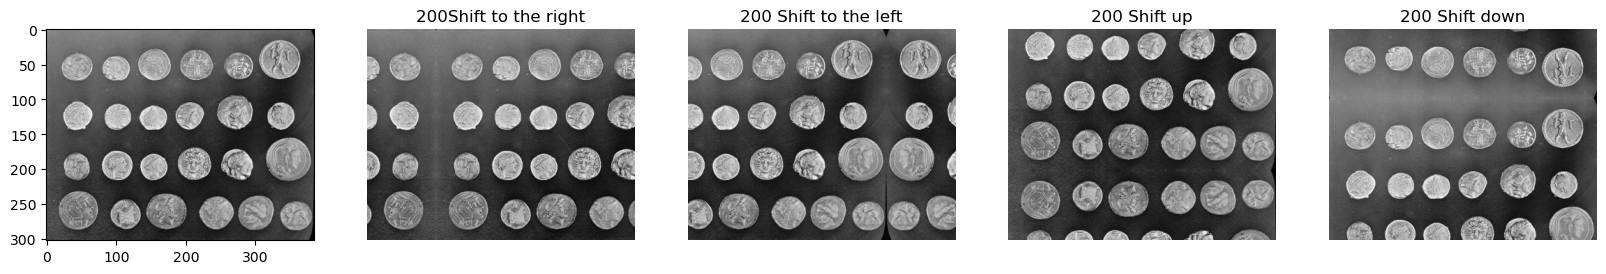

In [4]:
fig, axs = plt.subplots(1, 5, figsize=(20, 10))

to_shift = 200

axs[0].imshow(data.coins(), cmap='grey')

# 1
def shift_to_right(n):
    """
    Param n: number of pixels to shift to the right.

    Returns: kernel for shifting.
    """
    # write your solution here
    zeros = np.zeros(n)
    zeros[n - 1] = 1
    return np.array([zeros])
    # zeros = np.zeros((n, n))
    # zeros[0, n - 1] = 1
    # return np.array(zeros)

# 2
axs[1].imshow(convolve(data.coins(), shift_to_right(to_shift)), cmap="grey")
axs[1].set_title(f'{to_shift}Shift to the right')
axs[1].axis('off')

# 3
def shift_to_left(n):
    zeros = np.zeros(n)
    zeros[0] = 1
    return np.array([zeros])

def shift_to_up(n):
    zeros = np.zeros((n, 1))
    zeros[0, 0] = 1 
    return zeros

def shift_to_down(n):
    zeros = np.zeros((n, 1))
    zeros[n - 1, 0] = 1 
    return zeros

axs[2].imshow(convolve(data.coins(), shift_to_left(to_shift)), cmap='grey')
axs[2].set_title(f'{to_shift} Shift to the left')
axs[2].axis('off')

axs[3].imshow(convolve(data.coins(), shift_to_up(to_shift)), cmap='grey')
axs[3].set_title(f'{to_shift} Shift up')
axs[3].axis('off')

axs[4].imshow(convolve(data.coins(), shift_to_down(to_shift)), cmap='grey')
axs[4].set_title(f'{to_shift} Shift down')
axs[4].axis('off')



---
**Task 2 (medium): Gaussian blurring👩‍💻**
Construct a Gaussian filter and apply it to an image by following the steps below:
1. Design a 3x3 kernel (filter) for Gaussian blurring. Each element of the filter should be filled with values that approximate a Gaussian distribution.


**Hint**
The filter was covered during the lecture.

2. Plot the Gaussian Blur filter.
3. Apply the filter to one of the example image and display the original and blurred images side by side.
4. Explain the underlying reasons for the observed effects produced by this filter.
5. Implement the increased Gaussian blurring kernel shown below. Apply the filter to the selected image and compare the results to the results obtained in the previous steps. Explain the observed effects. 


$$
\begin{equation}
\frac{1}{256}
\begin{bmatrix}
1 & 4 & 6 & 4 & 1 \\
4 & 16 & 24 & 16 & 4 \\
6 & 24 & 36 & 24 & 6 \\
4 & 16 & 24 & 16 & 4 \\
1 & 4 & 6 & 4 & 1 \\
\end{bmatrix}
\end{equation}
$$

---

4. The kernel is created using the Gaussian distribution, which assumes most values fall within a given range. Now twisting this a bit and instead giving the distributions as a weight, on how much a pixel should count toward the final transformation of the kernel. This is indicated by the ply, which shows values closer to the center having a higher weight
5. While it's difficult to tell the difference between a gaussian kernel og 3 and 5, it's clear that the gaussian kernel have applied some smoothening compared to the original image

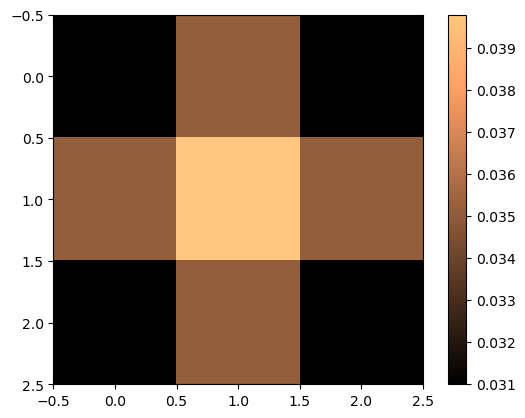

(-0.5, 383.5, 302.5, -0.5)

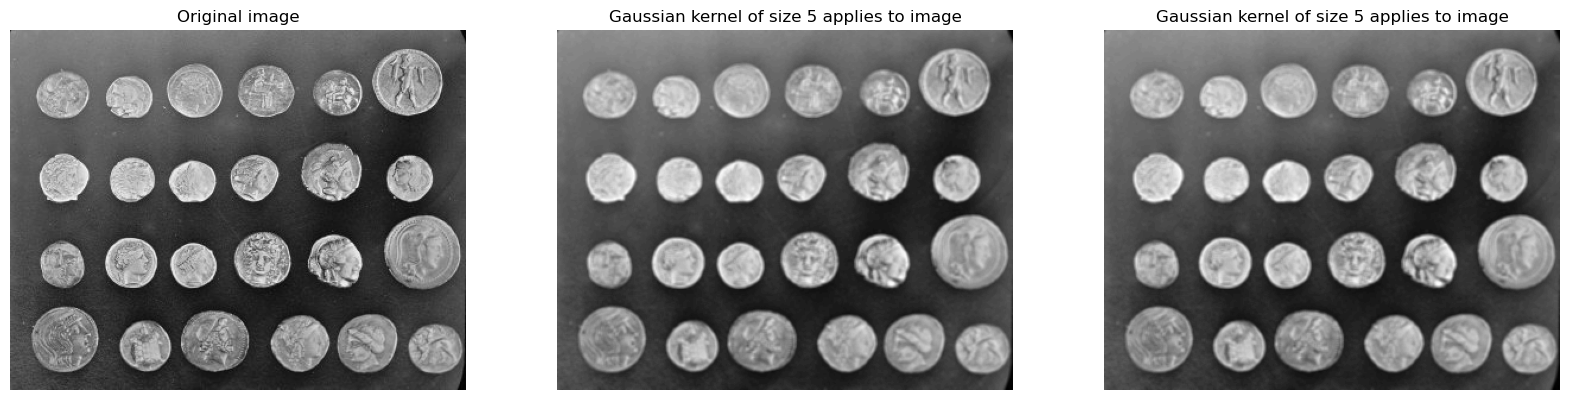

In [65]:
# write your solution here
# 1
sigma_gaussian = 2.0

def get_symmetrical_gaussian_kernel(size, sigma=1.0):
    kernel = np.ones((size, size))    
    kernel /= 2 * np.pi * sigma**2

    half = size // 2
    for x in range(size):
        for y in range(size):
            kernel[x, y] *= np.exp(-((x-half)**2 + (y-half)**2)/(2*sigma**2))

    return kernel

gaussian_kernel_3 = get_symmetrical_gaussian_kernel(3, sigma_gaussian)
gaussian_kernel_3

# 2
plt.imshow(gaussian_kernel_3, interpolation='nearest', cmap='copper')
plt.colorbar()
plt.show()

# 3
fig, axs = plt.subplots(1, 3, figsize=(20, 10))

img = data.coins()
axs[0].imshow(img, cmap='grey')
axs[0].set_title(f'Original image')
axs[0].axis('off')

axs[1].imshow(convolve(img, gaussian_kernel_3), cmap='grey')
axs[1].set_title(f'Gaussian kernel of size 5 applies to image')
axs[1].axis('off')

# 5
gaussian_kernel_5 = get_symmetrical_gaussian_kernel(5, sigma_gaussian)

axs[2].imshow(convolve(img, gaussian_kernel_3), cmap='grey')
axs[2].set_title(f'Gaussian kernel of size 5 applies to image')
axs[2].axis('off')


---
**Task 3 (medium): Template matching👩‍💻**
In the following exercise you will are going to implement template matching on the sunflower image (`sunflowers.jpg`
) found in the data library for this week's exercises.
1. Load the image, convert it to grayscale and normalize its pixel values. 
2. Define a rectangular region of interest (ROI) within the image. This ROI will serve as the template you want to extract from the image. and it should include the flower head of a single sunflower. Extract the template and plot it.
3. Implement template matching by using the [`skimage.feature.match_template`
](https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_template.html)
 function. The function returns a two-dimensional array (correlation map) that indicate the similarity or correlation between the template and regions of the input image. Plot the results.
4. Was the template correctly matched to the original image? Were there any other areas that appeared to be potential matches?


---

4. While the template used was the "brightess", the other sunflowers sere also mathced. Then sun also showed some form of matching, or maybe it was just the brightness of it? TODO:

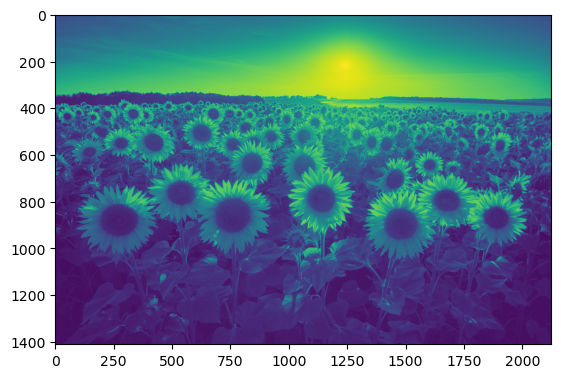

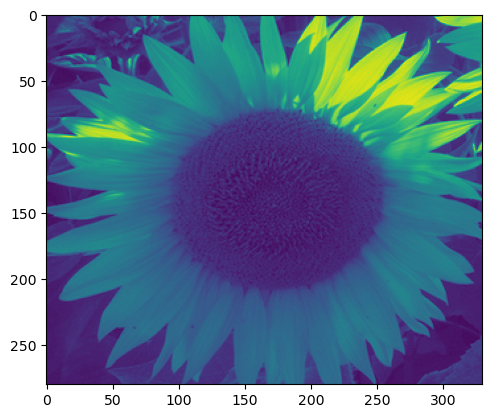

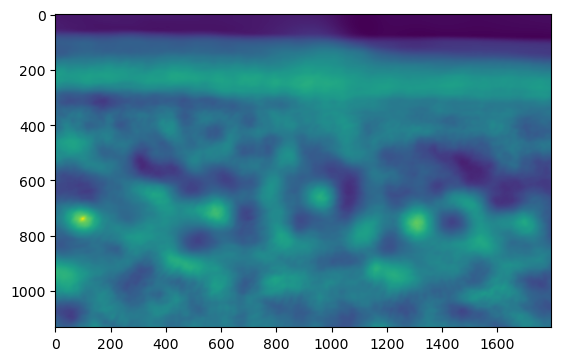

In [67]:
# write your solution here TODO:
# 1
sunflower_img = io.imread('./data/sunflowers.jpg')
sunflower_img = color.rgb2gray(sunflower_img)
sunflower_img = (sunflower_img - np.min(sunflower_img)) / (np.max(sunflower_img) - np.min(sunflower_img))

plt.imshow(sunflower_img)
plt.show()

# 2
sunflower_img_ROI = sunflower_img[740:1020, 100:430]
# sunflower_img_ROI = sunflower_img[810:950, 180:360]

plt.imshow(sunflower_img_ROI)
plt.show()

# 3
sunflower_template_match = feature.match_template(sunflower_img, sunflower_img_ROI)

plt.imshow(sunflower_template_match)
plt.show()


---
**Task 4 (medium): Sharpening👩‍💻💡**
In this task, you will create filters to sharpen the pixels of an input image, making details look clearer than in the original image. Here are two filters used for image sharpening:

$$
K_1=\frac{1}{9}\left[
	\begin{array}{r r r}
		-1 & -1 & -1 \\
		-1 & 17 & -1 \\
		-1 & -1 & -1
	\end{array}
\right],
K_2=\left[
	\begin{array}{r r r}
		-1 & -1 & -1 \\
		-1 &  9 & -1 \\
		-1 & -1 & -1
	\end{array}
\right]
$$
Notice that in this case the filter values sum to one.
1. Why do sharpen filters contain a single positive value at their centers, which are completely surrounded by negative values?

2. Define the above filter kernels as Numpy arrays.

3. Use the filter kernels $K_1$ and $K_2$ to sharpen one of the example images from the Scikit-Image library. Show the two filtered images and compare them with the original input image.

4. Implement the sharpening filter shown below and apply it to the selected image. Reflect on the effects of increasing the size of the sharpening filter. 



$$
\begin{equation}
\frac{1}{8}
\begin{bmatrix}
-1 & -1 & -1 & -1 & -1 \\
-1 & 2 & 2 & 2 & -1 \\
-1 & 2 & 8 & 2 & -1 \\
-1 & 2 & 2 & 2 & -1 \\
-1 & -1 & -1 & -1 & -1 \\
\end{bmatrix}
\end{equation}
$$

---

1. We want to sharpen the image, which can be done by increasing the contract between a pixel and its neighbours. This is done here by giving the neighbours a value of -1 while giving the pixel itself a positive value. This leads to a higher contrast especially around edges
2. I marks edges more clearly. In the coins example in kinda draws a line on the edge, that's wider than 1 pixel

(-0.5, 383.5, 302.5, -0.5)

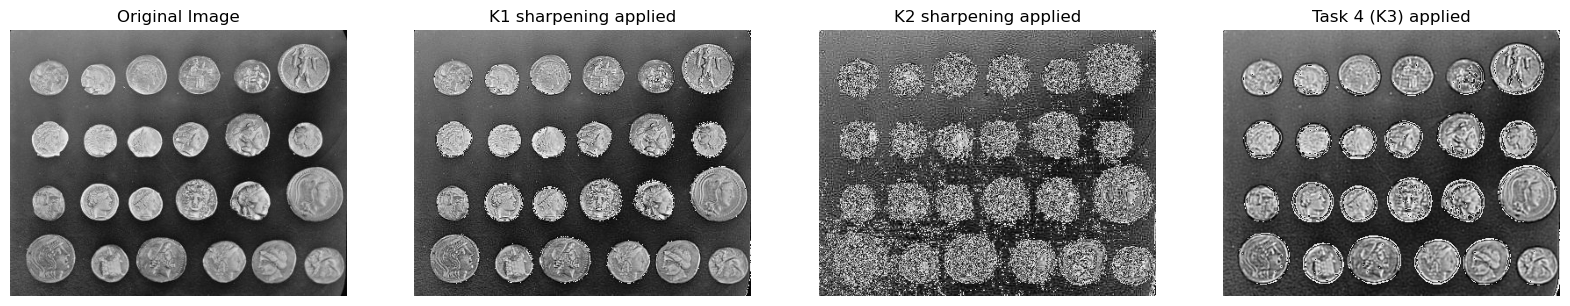

In [82]:
# write your solution here
# 2 + 4
# 2
sharpening_filter_k1 = np.array([
    [-1, -1, -1],
    [-1, 17, -1],
    [-1, -1, -1],
]) * (1/9)
sharpening_filter_k2 = np.array([
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1],
])
# 4
sharpening_filter_k3 = np.array([
    [-1, -1, -1, -1, -1],
    [-1, 2, 2, 2, -1],
    [-1, 2, 8, 2, -1],
    [-1, 2, 2, 2, -1],
    [-1, -1, -1, -1, -1],
]) * (1/8)

# 3 + 4
fig, axs = plt.subplots(1, 4, figsize=(20, 10))

sharpening_img = data.coins()
axs[0].imshow(sharpening_img, cmap="grey")
axs[0].set_title(f'Original Image')
axs[0].axis('off')

axs[1].imshow(convolve(sharpening_img, sharpening_filter_k1), cmap="grey")
axs[1].set_title(f'K1 sharpening applied')
axs[1].axis('off')

axs[2].imshow(convolve(sharpening_img, sharpening_filter_k2), cmap="grey")
axs[2].set_title(f'K2 sharpening applied')
axs[2].axis('off')

axs[3].imshow(convolve(sharpening_img, sharpening_filter_k3), cmap="grey")
axs[3].set_title(f'Task 4 (K3) applied')
axs[3].axis('off')